<a href="https://colab.research.google.com/github/Nami-59/Schelling/blob/main/Schelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import random
import numpy as np

In [2]:
def create_map(n, empty_ratio, blue_ratio, red_ratio):
  all_cells = []

  for i in range(0, int(n*n*empty_ratio)):
    all_cells.append(0)

  for i in range(0, int(n*n*blue_ratio)):
    all_cells.append(1)

  for i in range(0, int(n*n*red_ratio)):
    all_cells.append(2)

  random.shuffle(all_cells) #перемешиваем клетки
  random.shuffle(all_cells)
  random.shuffle(all_cells)

  cells = np.asarray(all_cells).reshape((n, n))
  cells = cells.tolist()

  return cells

In [3]:
def mass_index_empty(cells, n):
  index_empty = []
  for i in range(0, n):
    for j in range(0, n):
      if cells[i][j] == 0:
        index_empty.append([i, j])

  return index_empty

In [4]:
def is_unhappy(cells, x, y, n, index_empty): #проверка на счастье

    race = cells[x][y]
    count = 0 #счетчик "своих"

    if x > 0 and y > 0 and [x - 1, y - 1] not in index_empty:
        if cells[x - 1][y - 1] == race:
            count += 1

    if y > 0 and [x, y - 1] not in index_empty:
        if cells[x][y - 1] == race:
            count += 1

    if x < (n - 1) and y > 0 and [x + 1, y - 1] not in index_empty:
        if cells[x + 1][y - 1] == race:
            count += 1

    if x > 0 and [x - 1, y] not in index_empty:
        if cells[x - 1][y] == race:
            count += 1

    if x < (n - 1) and [x + 1, y] not in index_empty:
        if cells[x + 1][y] == race:
            count += 1

    if x > 0 and y < (n - 1) and [x - 1, y + 1] not in index_empty:
        if cells[x - 1][y + 1] == race:
            count += 1

    if y < (n - 1) and [x, y + 1] not in index_empty:
        if cells[x][y + 1] == race:
           count += 1

    if x < (n - 1) and y < (n - 1) and [x + 1, y + 1] not in index_empty:
        if cells[x + 1][y + 1] == race:
            count += 1

    if (count) >= 2:
          return False #возвращает false если он счастлив
    else:
          return True #возвращает true если несчастлив, то что нужно

In [5]:
def update(n_iterations, cells, n):
    index_empty = mass_index_empty(cells, n)
    for i in range(n_iterations):
        n_changes = 0
        for j in range(0, n):
          for k in range(0, n):
            if is_unhappy(cells, j, k, n, index_empty):
              # перемещаем клетки
                cell_race = cells[j][k]
                index = random.choice(index_empty)
                cells[j][k] = cells[index[0]][index[1]] #cells[j][k] = 0
                cells[index[0]][index[1]] = cell_race
                index_empty.remove(index)
                index_empty.append([j, k])
                n_changes += 1
        if n_changes == 0:
            break

    return cells

In [6]:
def pictures(initial_cells_map, result_cells_map):

  cmap1 = mpl.colors.ListedColormap(['white','b','r'])
  plt.figure(figsize=(20, 20))

  plt.subplot(221)
  plt.pcolormesh(initial_cells_map, edgecolors='k', shading='flat', cmap=cmap1) # исходная модель
  plt.title('Исходная модель Шеллинга', fontsize=20)
  plt.xticks([])
  plt.yticks([])

  plt.subplot(222)
  plt.pcolormesh(result_cells_map, edgecolors='k', shading='flat', cmap=cmap1) # результат
  plt.title('Результат', fontsize=20)
  plt.xticks([])
  plt.yticks([])

  plt.subplots_adjust(wspace = 0.05)

In [14]:
def check(cells, n):
  index_empty = mass_index_empty(cells, n)
  count = 0
  for j in range(0, n):
    for k in range(0, n):
      if [j, k] not in index_empty:
        if is_unhappy(cells, j, k, n, index_empty):
          count +=1

  return count

# 50X50

In [21]:
cells_map = create_map(50, 0.1, 0.45, 0.45)
initial_cells_map = copy.deepcopy(cells_map)

In [22]:
result_cells_map = update(1000, cells_map, 50)

count_unhappy = check(result_cells_map, 50)

print('Итоговое количество "несчастных" клеток: ', count_unhappy)

Итоговое количество "несчастных" клеток:  0


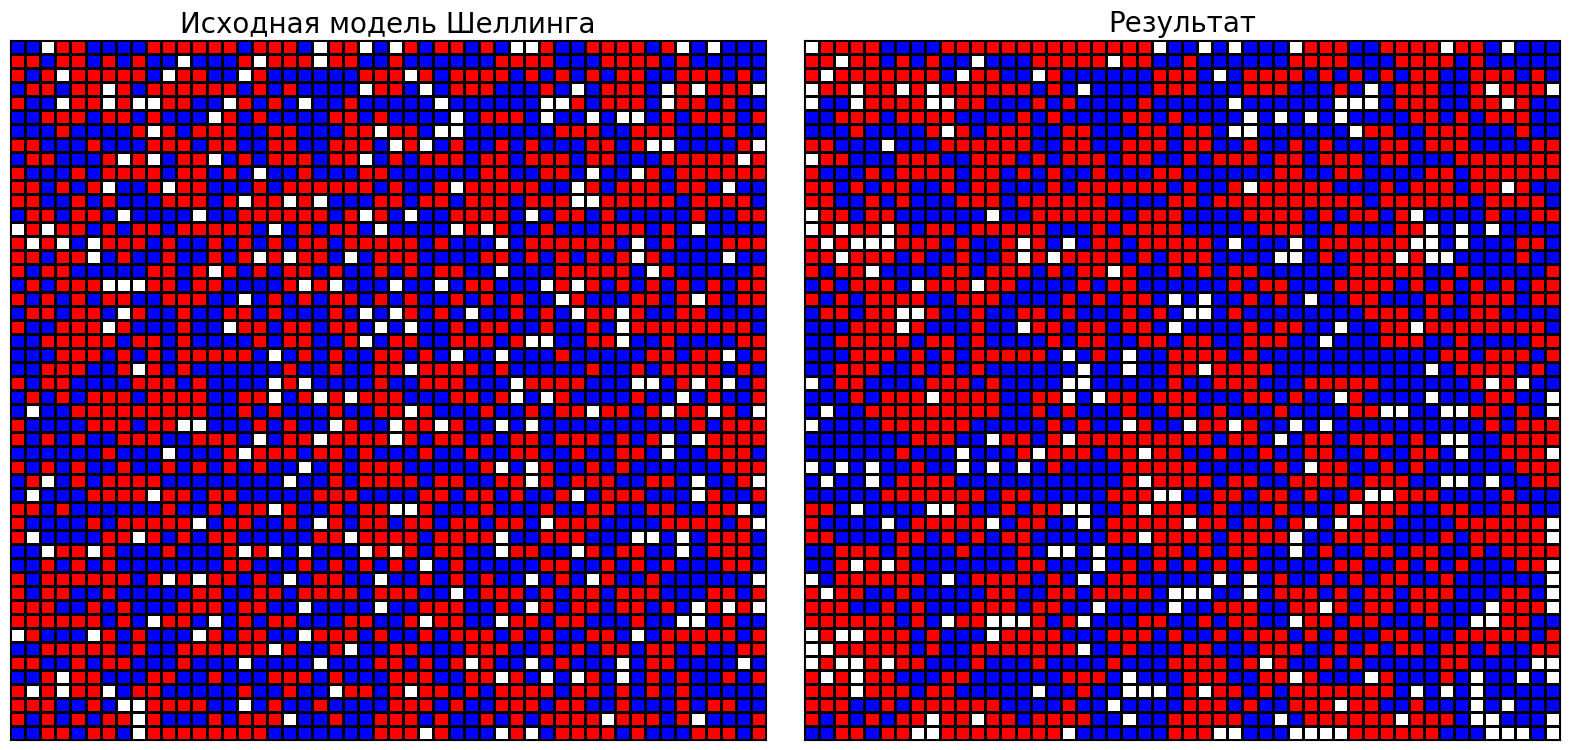

In [23]:
pictures(initial_cells_map, result_cells_map)
plt.savefig('schelling_50X50.png', bbox_inches='tight')

# 100X100

In [24]:
cells_map = create_map(100, 0.1, 0.45, 0.45)
initial_cells_map = copy.deepcopy(cells_map)

In [25]:
result_cells_map = update(1000, cells_map, 100)

count_unhappy = check(result_cells_map, 100)

print('Итоговое количество "несчастных" клеток: ', count_unhappy)

Итоговое количество "несчастных" клеток:  0


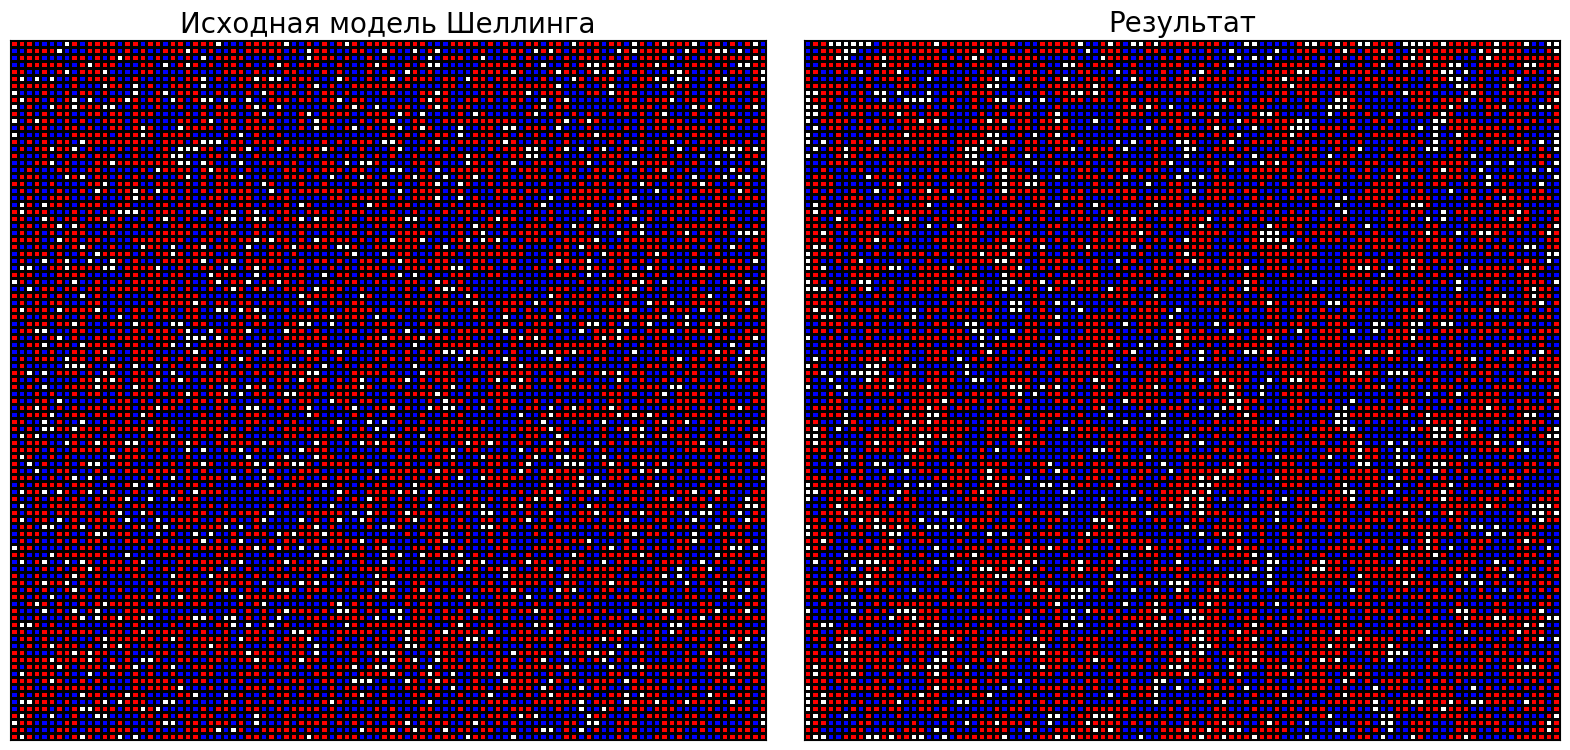

In [26]:
pictures(initial_cells_map, result_cells_map)

plt.savefig('schelling_100X100.png',  bbox_inches='tight')

# 20X20

In [18]:
cells_map = create_map(20, 0.1, 0.45, 0.45)
initial_cells_map = copy.deepcopy(cells_map)

In [19]:
result_cells_map = update(1000, cells_map, 20)

count_unhappy = check(result_cells_map, 20)

print('Итоговое количество "несчастных" клеток: ', count_unhappy)

Итоговое количество "несчастных" клеток:  0


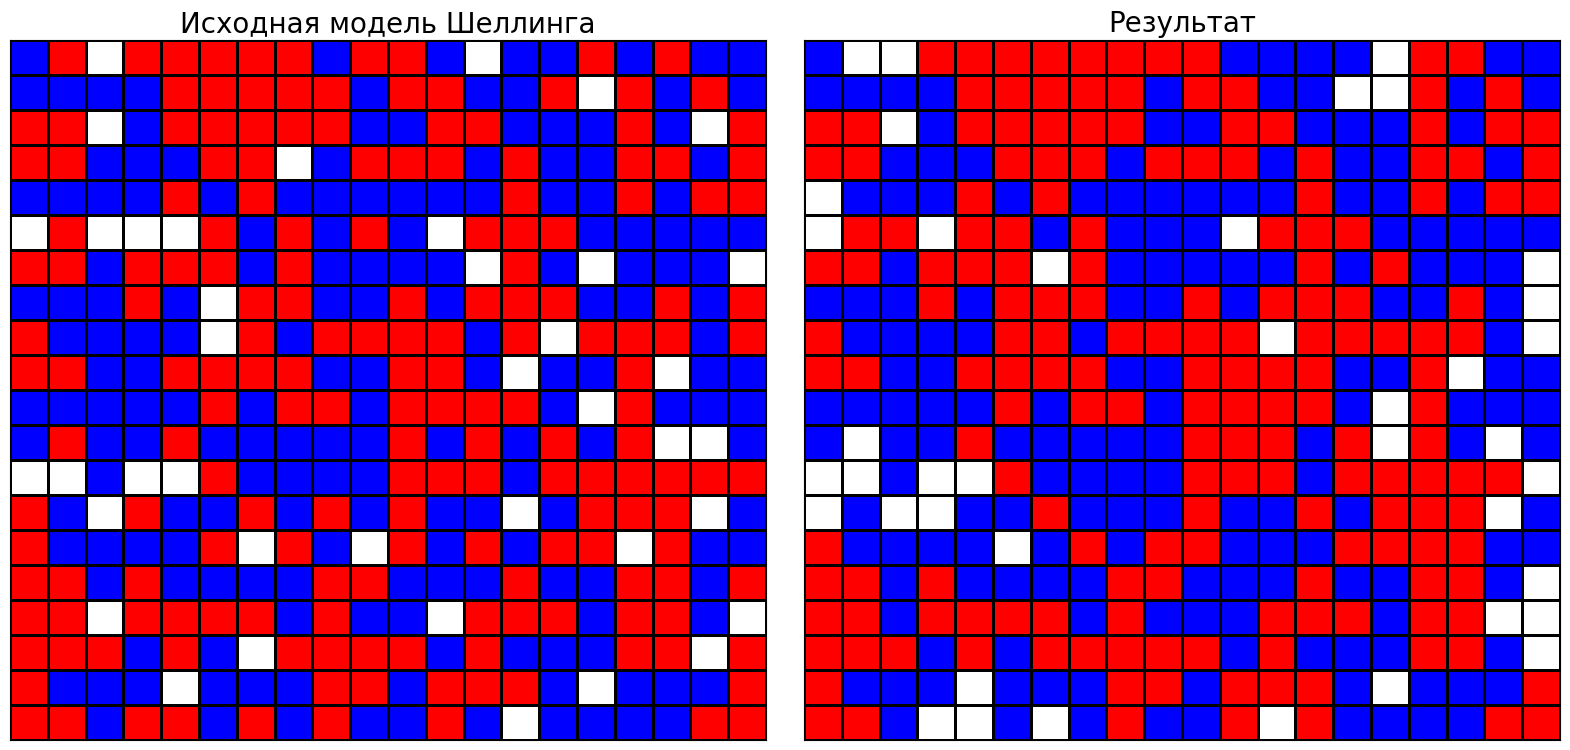

In [20]:
pictures(initial_cells_map, result_cells_map)

plt.savefig('schelling_20X20.png',  bbox_inches='tight')